<a href="https://colab.research.google.com/github/Rao-Prajwal/ToDo-App/blob/master/create_and_train_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow import keras

from keras.datasets import mnist
from keras.utils import to_categorical

import matplotlib.pyplot as plt
import numpy as np

In [ ]:
(x_train, y_train),(x_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [ ]:
x_train = x_train.reshape(60000,28,28,1)/255
x_test = x_test.reshape(10000,28,28,1)/255

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [ ]:
print('',x_train.shape, y_train.shape, '\n', x_test.shape, y_test.shape)

 (60000, 28, 28, 1) (60000, 10) 
 (10000, 28, 28, 1) (10000, 10)


In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D

In [ ]:
# Create and compile model

model = Sequential(name='Digit_Recognition_Model')

model.add(Conv2D(64, kernel_size=3, activation='relu', input_shape=(28,28,1), name='conv_0'))
model.add(Conv2D(32, kernel_size=3, activation='relu', name='conv_1'))
model.add(Flatten(name='flatten'))
model.add(Dense(10, activation='softmax', name='output'))

model.compile(optimizer='adam', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

In [ ]:
model.summary()

Model: "Digit_Recognition_Model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv_0 (Conv2D)              (None, 26, 26, 64)        640       
_________________________________________________________________
conv_1 (Conv2D)              (None, 24, 24, 32)        18464     
_________________________________________________________________
flatten (Flatten)            (None, 18432)             0         
_________________________________________________________________
output (Dense)               (None, 10)                184330    
Total params: 203,434
Trainable params: 203,434
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=3)

Epoch 1/3
1875/1875 [==============================] - 171s 91ms/step - loss: 0.1234 - accuracy: 0.9626 - val_loss: 0.0547 - val_accuracy: 0.9820
Epoch 2/3
1875/1875 [==============================] - 179s 96ms/step - loss: 0.0466 - accuracy: 0.9856 - val_loss: 0.0427 - val_accuracy: 0.9865
Epoch 3/3
1875/1875 [==============================] - 171s 91ms/step - loss: 0.0298 - accuracy: 0.9906 - val_loss: 0.0557 - val_accuracy: 0.9838


In [ ]:
model.save('digit_recog_model.h5')

Visualizing the output of the layers of the model.



predict by changing the input

In [ ]:
index = 7

x = x_test
y = y_test[index]

prediction = model.predict(x[index].reshape(1,28,28,1))
print('Predicted answer : ', np.argmax(prediction))
print('Actual answer    : ', np.argmax(y))

layer_output_0 = keras.models.Sequential(model.layers[0])(x[index].reshape(1,28,28,1))
layer_output_1 = keras.models.Sequential(model.layers[1])(layer_output_0)

Predicted answer :  9
Actual answer    :  9


In [ ]:
model.evaluate(x,y_test)

313/313 [==============================] - 7s 22ms/step - loss: 4.0766 - accuracy: 0.3301


[4.076633453369141, 0.33009999990463257]

Output : layer 0


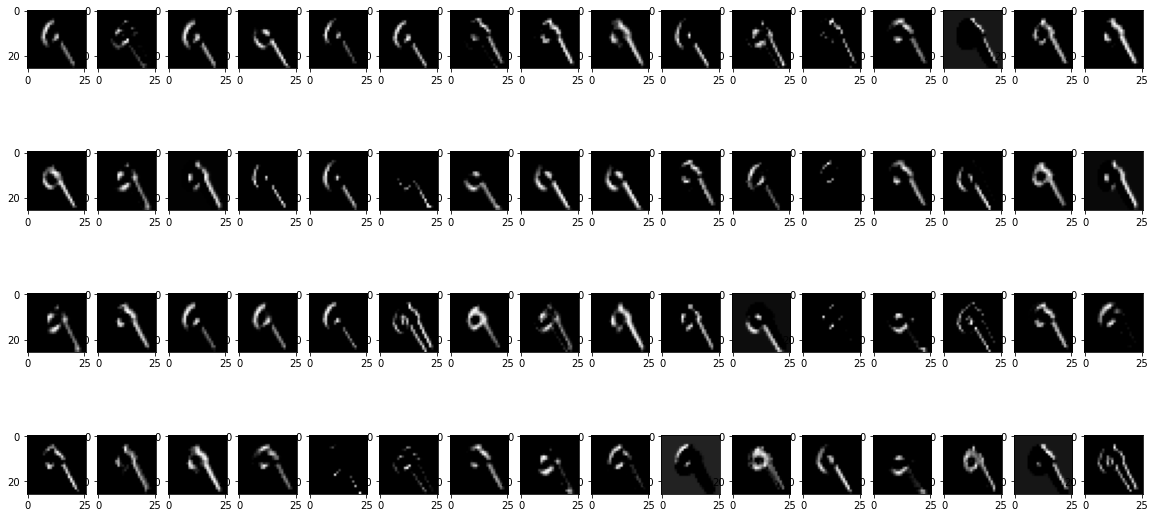

In [ ]:
rows, cols = 4,16

fig, ax = plt.subplots(rows, cols, figsize=(20,10))
index = 0;

print('Output : layer 0')
for row in range(rows):
  for col in range(cols):
    ax[row][col].imshow(layer_output_0[0,:,:,index], cmap='gray')
    index = index+1
plt.show()

Output : layer 1


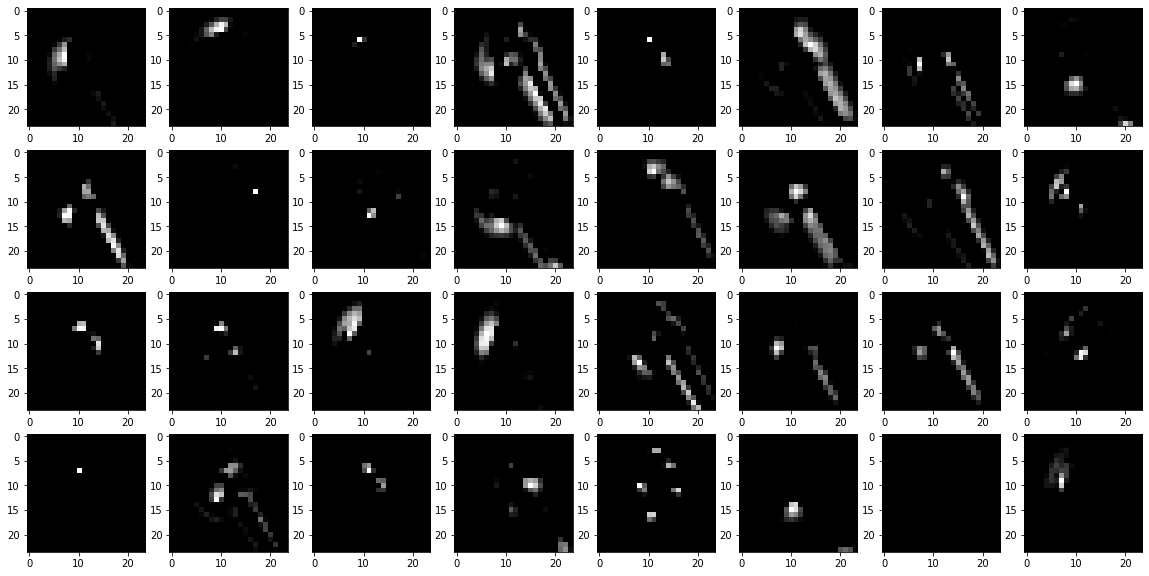

In [ ]:
rows, cols = 4, 8

fig, ax = plt.subplots(rows, cols, figsize=(20,10))
index = 0;

print('Output : layer 1')
for row in range(rows):
  for col in range(cols):
    ax[row][col].imshow(layer_output_1[0,:,:,index], cmap='gray')
    index = index+1
plt.show()